## Human Proofreading Evaluation & Metrics Algorithm
###  AGENTS Cohort: Scalability & Analysis Team


Overview of Process Pipeline
1. Kernel Density estimation using gaussian kernel and variable smoothness coefficient h 
2. Construct prior scores using CDF computation and 
3. Construct Likelihood estimation using 3 attributes (given new data)
4. Develop a final posterior score

In [4]:
# import relevant packages 
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Step 1: KDE fitting and Prior Score estimation

1. Define $m \in [0,1] $ as the prior score of a human proofreader. This is directly determined from $Y \in [0,1]$, which is defined as the proportion of proofreading tasks that a proofreader gets correct (based expert ground truth data). 
2. The distribution of $Y \sim f(y_{i})$ where ${i}$ denotes a particular human proofreader: $ 0 <= i <= n$ for n number of total proofreaders. 
3. Estimate $f(y_{i})$. Given the high uncertainty around predictions for parameters of a distribution, a nonparametric technique will be deployed.

    Deploy Kernel Density Estimation (KDE) on proofreader accuracy values from historical tasks completed
        - with hyperparameter Bandwidth $h$  i.e. smoothing coefficient 

   
 >$\displaystyle \mathrm{KDE}(x) = \frac{1}{n}\sum_i K_h(x\!-\!x_i) = \frac{1}{nh}\sum_i K\left(\frac{x\!-\!x_i}{h}\right)$
   
    - Can use different K  kernel functions
        - E.g., Uniform, Triangular, Gauss, Epanechnikov
    - For this model, a Gaussian kernel will be deployed.

4. Compute the cdf (with a fitted value) to generate prior scores: >$\displaystyle \pi(x_{i}) = P(Y < y_{i}) $
- From data $D$ we infer the parameters $\theta$ of model where $\theta$ are our estimates for the 'score' of each human proofreader

>$\displaystyle p(\theta) = \frac{\pi(\theta)\,{\cal{}L}(\theta)}{\int \pi(\theta)\,{\cal{}L}(\theta)\ d\theta }$



In [33]:
def kde_pdf(data_vector, h):
    '''
    Goal: Fit a KDE on the distribution of given data accross all human proofreaders
    Parameters:
        data_vector: input transposed data vector (ex. average accuracy rate for each proofreader, avg duration for a task)
        h: Bandwidth h
    Return:
        kde_estimation plot
        Prior score: [0,1]
    '''
    normalized = (1/(len(data_vector))*h)
    
    sum = 0

    # define support of the cont rv (estimation based on lower and upper bound thresholds)
    # NOTE: our support will be (0,1) given our input data is accuracy and prior estimations will be of the same range of value
    x = np.arange(min(data_vector) - 0.2,max(data_vector) + 0.2, 0.001)
    
    for i in range(len(data_vector)):
        u = (x-data_vector[i])/h
        sum += stats.norm.pdf(u, loc = 0, scale = 1)

    result = normalized * sum


    # note to compute the cdf we will take input value and 

        # FINISH THIS PART LATER !!!!!

    return result

Text(0, 0.5, 'Probability')

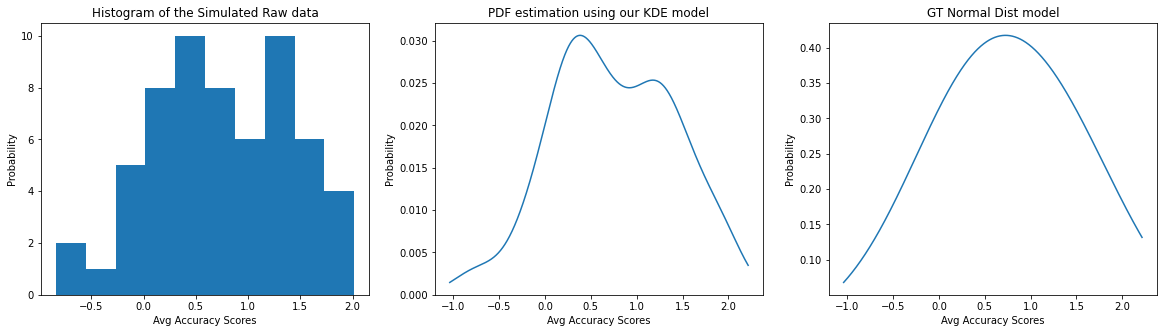

In [37]:
# Generate dummy data to check if the above model works 
np.random.seed(123)
sim_data = stats.norm(loc=0.7, scale=0.55).rvs(60) 
# this 60 simulated points to represent the approx number of proofreaders where the 
# avg accuracy score is simualted to be approx normal with mean=0.7 and std = 0.3


# test and simulate the model against the built in scipy KDE package 
x = np.arange(min(sim_data) - 0.2,max(sim_data) + 0.2, 0.001)

# ground truth model with default fit of h = 1
kde_package = stats.gaussian_kde(sim_data,1)
pdf_scores_package = kde_package.evaluate(x)

# our model with estimated h as h = 0.654
pdf_scores_model = kde_pdf(sim_data,0.235)

# plot the pdf 
fig_1 = plt.figure(figsize = (20,5), facecolor='w',edgecolor='k')

plt.subplot(131)
plt.title('Histogram of the Simulated Raw data')
plt.hist(sim_data)
plt.xlabel('Avg Accuracy Scores')
plt.ylabel('Probability')

plt.subplot(132)
plt.title('PDF estimation using our KDE model')
plt.plot(x,pdf_scores_model)
plt.xlabel('Avg Accuracy Scores')
plt.ylabel('Probability')

plt.subplot(133)
plt.title('GT Normal Dist model')
plt.plot(x,pdf_scores_package)
plt.xlabel('Avg Accuracy Scores')
plt.ylabel('Probability')


### Step 2: Likelihood Function Estimation

1. Consider 3 attributes given new data (new batch of completed proofreading tasks):
Define $L$ as the number of new proofreading tasks completed

For each proofreader i, we construct the following metrics for our likelihood:

a. S_{avg} = [Accuracy Score among L tasks]

b. T_{avg} = [Time for task completeion among L tasks]

c. D_{avg} = [Difficulty of tasks among L tasks]

The importance of computing the inverse function for time and difficulty ratings. 1/T and 1/D will produce a monotone decreasing function as t, d --> $\inf$

Output the following data vectors:

--> $S_{f} = [S_{1}, S_{2}, ..., S_{n}]$

--> $1/T_{f} = [1/T_{1}, 1/T_{2}, ..., 1/T_{n}]   $

--> $1/D_{f} = [1/D_{1}, 1/D_{2}, ..., 1/D_{n}] $

2. Construct the multivariate distribution of the 3 attributes from above.

$  \phi(b_{i}) = (\frac{1}{2 \pi})^{\frac{p}{2}} |\Sigma|^{\frac{-1}{2}}  \exp(\frac{-1}{2} (\overrightarrow{x} - \overrightarrow{\mu}) |\Sigma|^{-1} (\overrightarrow{x} - \overrightarrow{\mu})  )$ = Multivariate_normal $ (\overrightarrow{\mu}, \overrightarrow{\sigma})$


In [ ]:
def likelihood_estimates(x_i, att1, att2, att3):
    '''
    Goal: output the probablistic values of the likelihood function
    Parameters: 
    
    Return:

    '''
        